Notebook for calculating the k-correction factor for APEC plasma emission model
Sherpa must be installed in order to run this notebook

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sherpa.astro.ui import dataspace1d, set_source, xsapec,calc_kcorr
from scipy.interpolate import interp2d


In [11]:
elo = 0.5 # lower limit of the energy range
ehi = 2.0 # upper limit of the energy range
dataspace1d(0.1, 7.0, 0.01, id=1)
#Define the apec  model:
set_source(xsapec.plasma)

plasma.abundanc = 0.3
@np.vectorize
def K(z, kT):
    plasma.kT = kT
    k = calc_kcorr(z, elo, ehi, id=1)
    return k

zs = np.linspace(0.01, 1, 100) # redshift range
kTs = np.geomspace(1, 10, 100) # temperature range

zaxis, kTaxis = np.meshgrid(zs, kTs)
Kaxis = K(zaxis, kTaxis)
np.savez('k_correction.npz', zaxis=zaxis, kTaxis=kTaxis, Kaxis=Kaxis)
kTaxis_int = interp2d(zaxis, kTaxis, Kaxis, kind='linear')


Text(0, 0.5, 'kT')

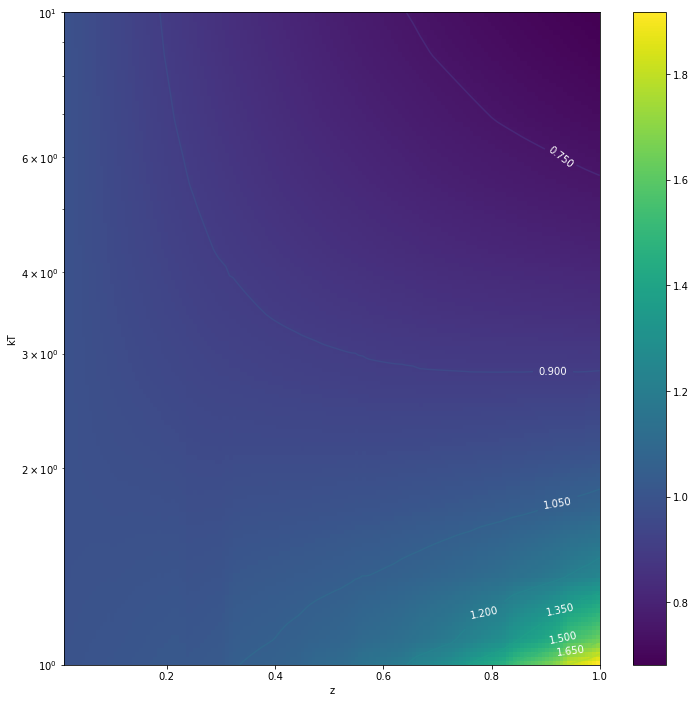

In [8]:
fig,  ax =  plt.subplots( figsize = (12,12))

im2 = ax.pcolormesh(zs, kTs, kTaxis_int(zs, kTs), )
cp = ax.contour(zs, kTs, kTaxis_int(zs, kTs), 10)
plt.colorbar(im2)
plt.clabel(cp, inline=True, fontsize=10, colors = 'white')

ax.set_yscale('log')
ax.set_xlabel('z')
ax.set_ylabel('kT')


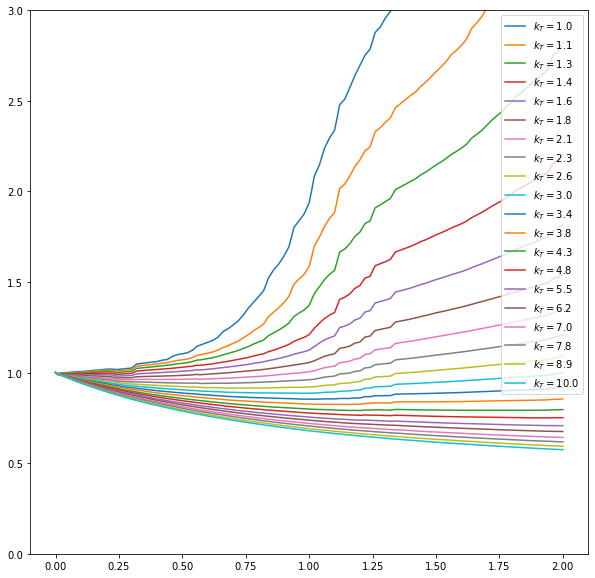

In [9]:

kTs = np.geomspace(1, 10, 20)
plt.figure(figsize=(10,10))
for kT in kTs:
    plasma.kt = kT
    k = calc_kcorr(z, elo, ehi, id=1)
    plt.plot(z, k, label=r'$k_{T} = %.1f$' % kT)

plt.ylim(0, 3)
plt.legend()
